# 課題7. 図形の面積の計算

1. ソースコードを改変し，画像中の6つの各図形の面積（画素数）を計算しなさい．
    - 計算するのは面積の合計ではなく，各図形の面積であることに注意してください．
    - 一度の実行で6つの面積を一気に計算するプログラムである必要はありません．値を変え，6回実行する形式で構いません．
2. !レポート!　作成したプログラムによってどのような処理が行われているのかを分かりやすく説明しなさい．


変換前の画像


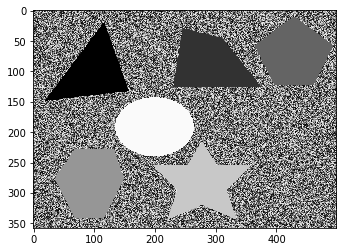

変換前のヒストグラム


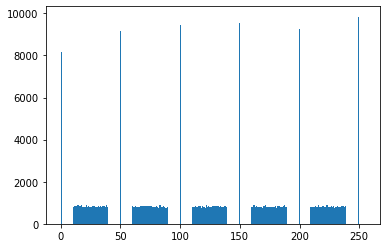

0
変換後の画像


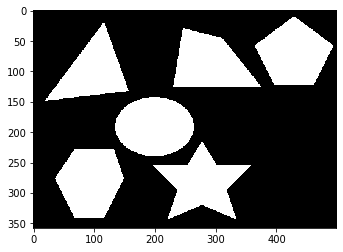

グレースケール0の図形の面積：8145.0[px]
グレースケール50の図形の面積：9185.0[px]
グレースケール100の図形の面積：9425.0[px]
グレースケール150の図形の面積：9545.0[px]
グレースケール200の図形の面積：9265.0[px]
グレースケール250の図形の面積：9841.0[px]


In [95]:
from pylab import *
from cv2 import imread

# ローカルディレクトリにDLした画像を読み込み
gazo = imread( "kadai7.bmp", 0 )
cnt = zeros(256)
area = {}
cnt2 = {}

print("変換前の画像")
imshow(gazo, cmap="gray", vmin=0, vmax=255)
show()

# ヒストグラムを表示
print("変換前のヒストグラム")
hist( gazo.flatten(), 256, (0,255) )
show()

# 数値化された画像データから値毎の出現数を計数する
for y in range(0,358):
    for x in range(0,499):
        cnt[gazo[y][x]] += 1

# 孤立した値を固有の図形として面積として計数する
for i, x in enumerate(cnt):
    if cnt[i] != 0 and cnt[i - 1] == 0 and cnt[i + 1] == 0:
        area[i] = x

# 計数対象の図形のピクセル数が取得できている事を確認する
menseki = 0
for y in range(0,358):
    for x in range(0,499):
        ######### ここを変更 ############
        if gazo[y][x] in area:
            # 計数対象の図形のグレースケールを255へ上書きする
            gazo[y][x] = 255
        else:
            gazo[y][x] = 0
        #############################

print(menseki)
# 画素値を表示する
print("変換後の画像")
imshow(gazo, cmap="gray", vmin=0, vmax=255)
show()

for k in area.keys():
    print("グレースケール" + str(k) + "の図形の面積：" + str(area[k]) + '[px]')

## 作成したプログラムの処理
1. 画像の読み込み
2. ヒストグラムを表示
3. 数値化された画像データから値毎の出現数を計数する
4. 孤立した値を固有の図形として面積として計数する
5. 計数対象の図形のピクセル数が取得できている事を確認する
6. 画素値を表示する